In [195]:

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import StratifiedKFold

In [219]:
dt_set = pd.read_table("C:/Users/USER/Downloads/imdb_labelled.txt", sep="\t", header=None)
dt_set.info()
dt_set.head(748)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       748 non-null    object
 1   1       748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [198]:
dt_set.columns = ['texts', 'sentiments']

In [199]:
dt_set.head(20)

,texts,sentiments
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [200]:
dt_set['sentiments'].value_counts()

1    386
0    362
Name: sentiments, dtype: int64

6.0
4.0


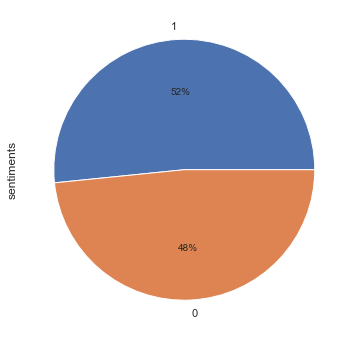

In [201]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

dt_set['sentiments'].value_counts().plot(kind='pie', autopct='%1.0f%%')


In [202]:
dt_set['labels'] = dt_set['sentiments'].apply(lambda x: 'positive' if x else 'negative') 
dt_set.head()

,texts,sentiments,labels
0,"A very, very, very slow-moving, aimless movie ...",0,negative
1,Not sure who was more lost - the flat characte...,0,negative
2,Attempting artiness with black & white and cle...,0,negative
3,Very little music or anything to speak of.,0,negative
4,The best scene in the movie was when Gerardo i...,1,positive


In [203]:
dt_set['lengths'] = dt_set['texts'].apply(lambda x: len(str(x).split(' ')))
dt_set.head()

,texts,sentiments,labels,lengths
0,"A very, very, very slow-moving, aimless movie ...",0,negative,15
1,Not sure who was more lost - the flat characte...,0,negative,21
2,Attempting artiness with black & white and cle...,0,negative,33
3,Very little music or anything to speak of.,0,negative,10
4,The best scene in the movie was when Gerardo i...,1,positive,23


In [204]:
dt_set['lengths'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800],
      dtype=int64)

In [205]:
X = dt_set['texts']
y = dt_set['sentiments']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 60)

In [207]:
X_train.shape, X_train.to_list()[:10]

((448,),
 ['I am so tired of clichés that is just lazy writing, and here they come in thick and fast.  ',
  'Nothing short of magnificent photography/cinematography in this film.  ',
  'The acting was bad, the dialogs were extremely shallow and insincere.  ',
  "The soundtrack wasn't terrible, either.  ",
  'Much more interesting, more action, more suspense, and less of the unneeded controversy.  ',
  "Feelings, thoughts...Gabriel's discomfort during the dance...all these intangibles leap to life and come within the viewer's grasp in Huston's portrayal.  ",
  ' With great sound effects, and impressive special effects, I can\'t recommend this movie enough.  \t1\nCall me a nut, but I think this is one of the best movies ever.  \t1\nGreat character actors Telly Savalas and Peter Boyle.  \t1\n1 hour 54 minutes of sheer tedium, melodrama and horrible acting, a mess of a script, and a sinking feeling of GOOD LORD, WHAT WERE THEY THINKING?  \t0\nLots of holes in the script.  \t0\nIt\'s like a

In [208]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)

tfidf_df = pd.DataFrame(data=tfidf.toarray().astype(float), columns=tfidf_vectorizer.get_feature_names())

tfidf_df["__labels__"] = y_train.values
tfidf_df.head()

,10,15pm,17,1947,1948,1949,1980,1986,1995,1998,...,you,young,younger,your,yourself,youtube,zillion,zombie,zombiez,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [210]:

voc = Counter(tfidf_vectorizer.get_feature_names())
voc.most_common(10)

[('10', 1),
 ('15pm', 1),
 ('17', 1),
 ('1947', 1),
 ('1948', 1),
 ('1949', 1),
 ('1980', 1),
 ('1986', 1),
 ('1995', 1),
 ('1998', 1)]

In [211]:
word = 'very'
xv = tfidf_df[tfidf_df['__labels__']== 1][word]
xv.sort_values(ascending=False)

205    0.632173
360    0.406682
29     0.382558
337    0.369840
78     0.305672
         ...   
293    0.000000
292    0.000000
291    0.000000
290    0.000000
1      0.000000
Name: very, Length: 241, dtype: float64

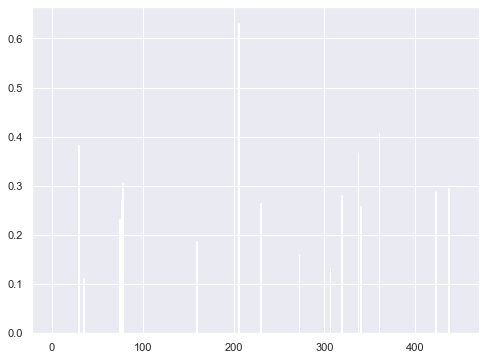

In [212]:
plt.bar(xv.index, xv.values)
plt.show()

In [213]:
vectorization = Pipeline([('BoW', CountVectorizer(stop_words = 'english')),
                        ('tfidf', TfidfTransformer()),
                        ('classifier', MultinomialNB())
                        ])

In [214]:
model = vectorization.fit(X_train, y_train)


In [215]:
pred = model.predict(X_test)

In [216]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       155
           1       0.72      0.86      0.78       145

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [217]:

accuracy = []

stratifiedKf_pred = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
stratifiedKf_pred.get_n_splits(X, y)

for train_index, test_index in stratifiedKf_pred.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    
    vectorization.fit(X_train1, y_train1)
    result = vectorization.score(X_test1, y_test1)
    accuracy.append(result)
    
accuracy = np.array(accuracy)
print(accuracy)
print(f"mean_accuracy = {accuracy.mean():.4f}, std_accuracy = {accuracy.std():.4f}")

[0.78666667 0.79333333 0.75333333 0.76510067 0.74496644]
mean_accuracy = 0.7687, std_accuracy = 0.0187
